In [1]:
import scanpy as sc
from anndata.experimental import concat_on_disk
from umap import UMAP
import numpy as np

import bionty as bt
from scdataloader.utils import get_all_ancestors

import matplotlib
import datamapplot

→ connected lamindb: jkobject/scprint


In [9]:
# run the model in parallel in a slurm job
# conda activate scprint17
srun -p gpu -q gpu --gres=gpu:A40:4,gmem:40G --cpus-per-task 16 --mem-per-gpu 32G --ntasks-per-node=4 scprint predict --config config/base.yml --config config/pretrain_medium.yml --config config/predict.yml --ckpt_path /pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/vbd8bavn/checkpoints/epoch=17-step=90000.ckpt --model.pred_embedding ["cell_type_ontology_term_id"]

SyntaxError: invalid decimal literal (143214592.py, line 3)

In [ ]:
# combine the data into a nice umap
srun -p ml4ig -c 32 --mem 90G python figures/niceumap.py

In [2]:
ls -alh ../data/step_0_predict.h5ad

-rw-r--r-- 1 jkalfon ml4ig 332M May 30 18:17 ../data/step_0_predict.h5ad


In [2]:
adata = sc.read_h5ad("../data/o2uniqsx_predict.h5ad")
adata

AnnData object with n_obs × n_vars = 2560000 × 512
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'conv_pred_cell_type_ontology_term_id', 'conv_pred_disease_ontology_term_id', 'conv_pred_assay_ontology_term_id', 'conv_pred_self_reported_ethnicity_ontology_term_id', 'sprint_leiden', 'louvain_1.0', 'louvain_0.5', 'louvain_0.2'
    uns: 'louvain', 'neighbors'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [7]:
matplotlib.rcParams["figure.dpi"] = 150 # 150
matplotlib.rcParams['font.family'] = 'Regular'

findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: Font family 'Regular' not found.
findfont: F

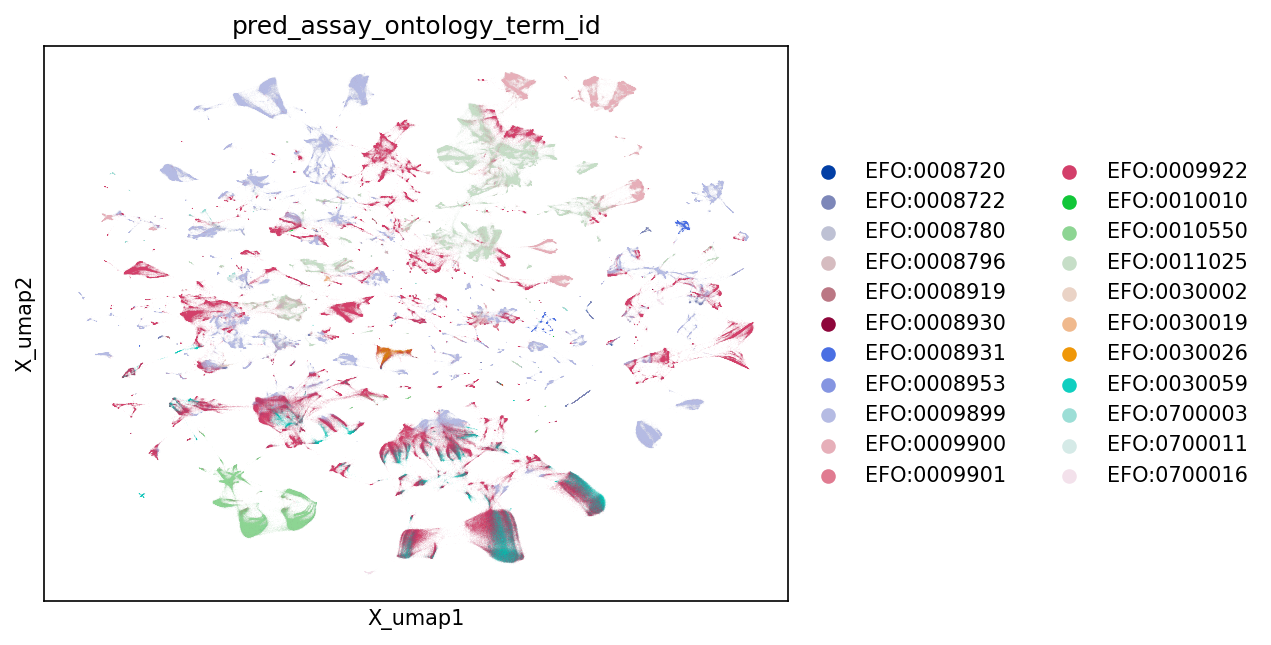

In [8]:
sc.pl.embedding(adata, 'X_umap', color='pred_assay_ontology_term_id')

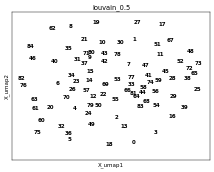

In [79]:
sc.pl.embedding(adata, 'X_umap', color='louvain_0.5', legend_loc='on data')

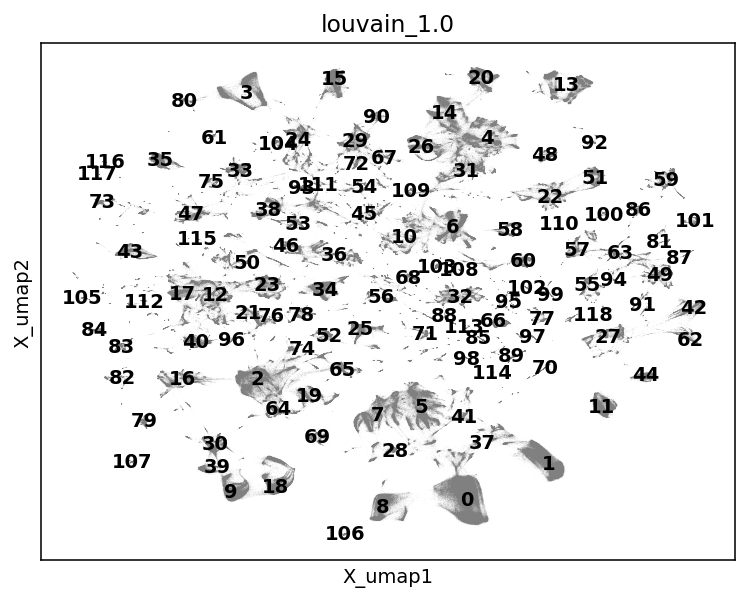

In [84]:
sc.pl.embedding(adata, 'X_umap', color='louvain_1.0', legend_loc='on data')

In [128]:
adata

AnnData object with n_obs × n_vars = 2560000 × 512
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'conv_pred_cell_type_ontology_term_id', 'conv_pred_disease_ontology_term_id', 'conv_pred_assay_ontology_term_id', 'conv_pred_self_reported_ethnicity_ontology_term_id', 'sprint_leiden', 'louvain_1.0', 'louvain_0.5', 'louvain_0.2', 'merge_pred_cell_type_ontology_term_id'
    uns: 'louvain', 'neighbors', 'louvain_1.0_colors', 'louvain_0.5_colors', 'merge_pred_cell_type_ontology_term_id_colors'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

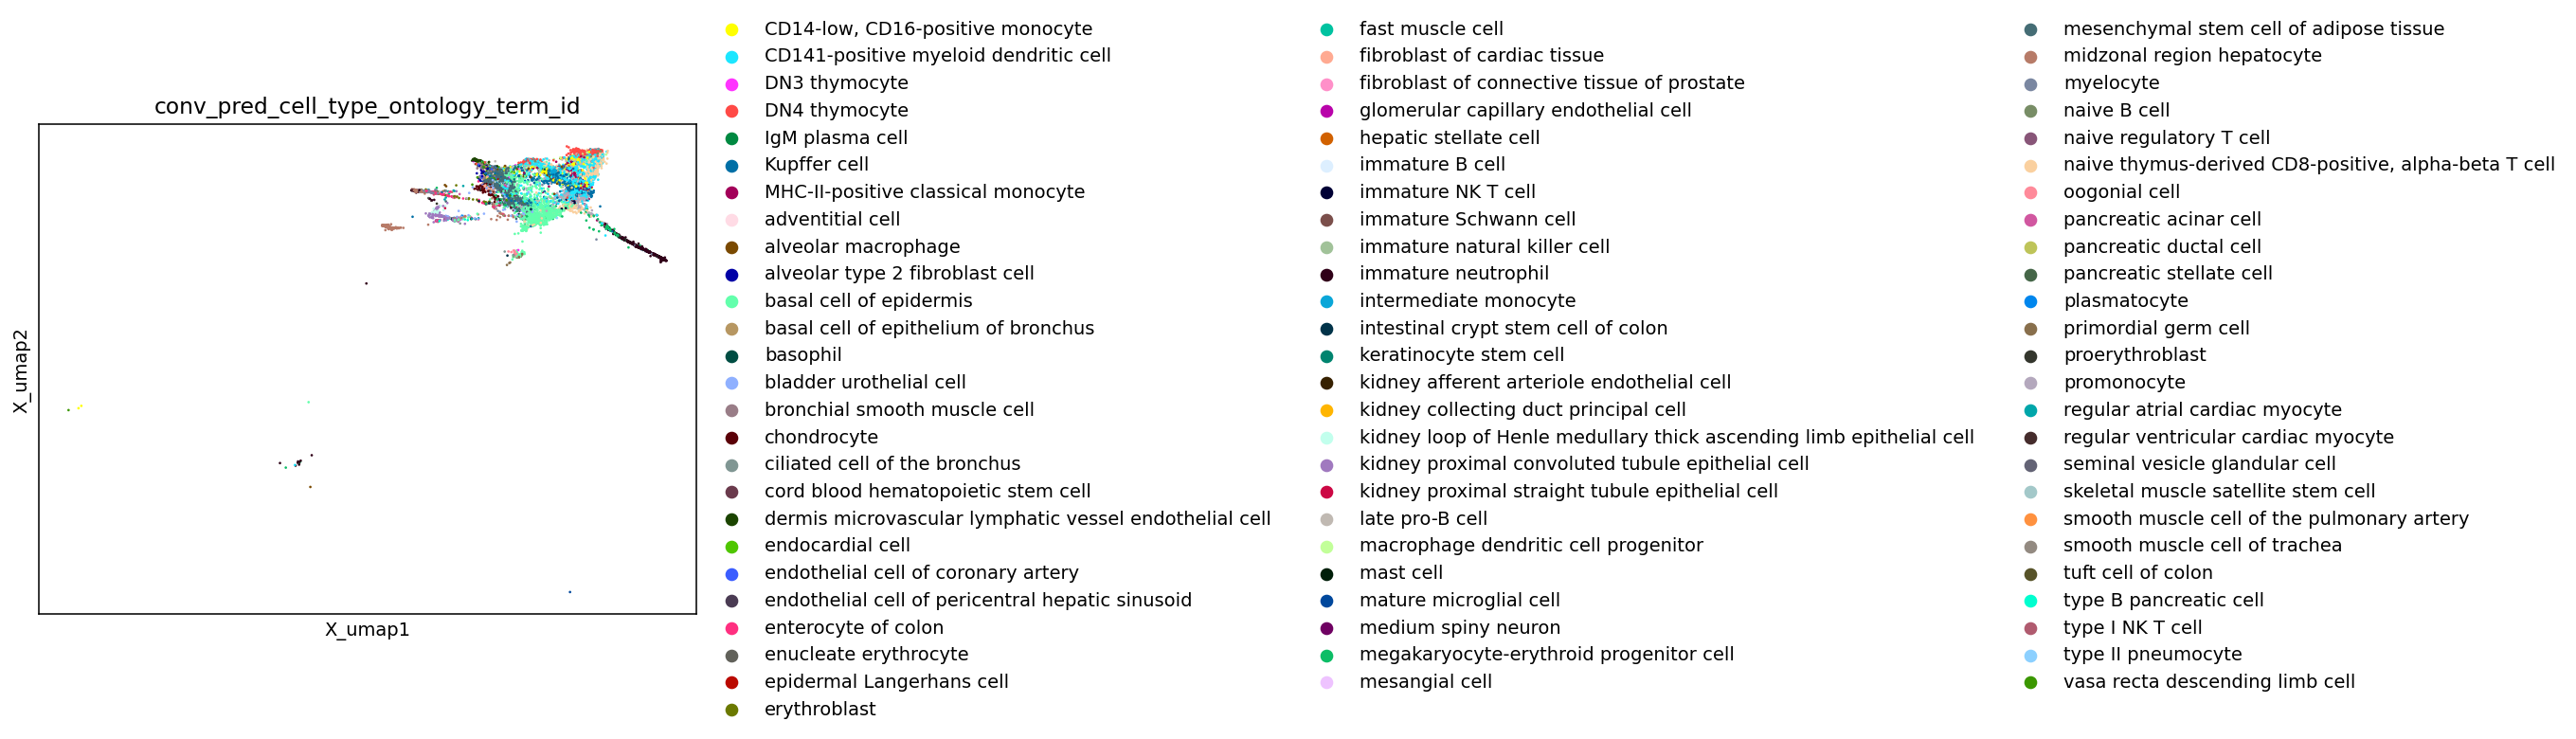

In [134]:
subadata = adata[adata.obs['louvain_1.0']=='59'].copy()
sc.pl.embedding(subadata, 'X_umap', color='conv_pred_cell_type_ontology_term_id')

... storing 'label' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


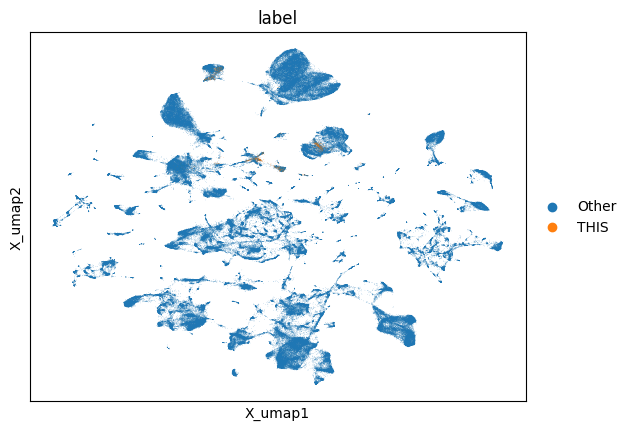

In [101]:
adata.obs['label'] = "Other"
adata.obs.loc[
    #(adata.obs['louvain_0.5']=='17') 
    #& 
    (adata.obs['conv_pred_cell_type_ontology_term_id']=='astrocyte of the cerebral cortex'), 'label'] = "THIS"
sc.pl.embedding(adata, 'X_umap', color='label')

In [64]:
cat='1.0'

adata.obs[(adata.obs['louvain_'+cat].isin([str(i) for i in range(12)]))]['pred_organism_ontology_term_id'].value_counts().head(20)

pred_organism_ontology_term_id
NCBITaxon:9606     766182
NCBITaxon:10090     49050
Name: count, dtype: int64

In [3]:
rename = {
"0":"neurons and interneurons",
"1":"dementia associated neurons and interneurons",
"2":"cardiac fibroblasts and endothelial cells",
"3":"normal t cells (10x v2)",
"4":"covid associated t cells",
"5":"oligodendrocytes precursors",
"6":"covid associated monocytes",
"7":"oligodendrocytes",
"8":"glutamatergic neurons",
"9":"neurons (sci-RNAseq)",
"10":"monocytes",
"11":"glutamatergic neurons (mouse)",
"12":"endothelial cells",
"13":"normal t cells (10x 5' v2)",
"14":"covid associated t cells (10x 5' v1)",
"15":"lupus associated t cells",
"16":"microglial cells",
"17":"fibroblasts",
"18":"macroglial cells (sci-RNAseq)",
"19":"myocytes",
"20":"covid associated t cells (10x 5' v2)",
"21":"tumor cells",
"25": "cultured cells",
"26":"lymphoma associated t cells",
"32": "enterocytes",
"35": "lupus associated monocytes",
"42": "cerebellar cells (mouse)",
"43": "cancer associated macrophages",
"44": "glutamatergic neurons (mouse)",
"49": "neurons (mouse)",
"51": "covid associated B cells",
"59": "mouse progenitor cells",
"62": "cerebellar cells (mouse)",
"63":"endothelial cells (mouse)",
"73": "cancer associated t cells",
}

In [143]:
num="44"
cat='1.0'
(
adata.obs[adata.obs['louvain_'+cat]==num]['pred_organism_ontology_term_id'].value_counts().head(3),
adata.obs[(adata.obs['louvain_'+cat]==num)]['conv_pred_cell_type_ontology_term_id'].value_counts().head(20), 
adata.obs[adata.obs['louvain_'+cat]==num]['conv_pred_disease_ontology_term_id'].value_counts().head(10),
adata.obs[adata.obs['louvain_'+cat]==num]['conv_pred_assay_ontology_term_id'].value_counts().head(10)
)

(pred_organism_ontology_term_id
 NCBITaxon:10090    22658
 NCBITaxon:9606         0
 Name: count, dtype: int64,
 conv_pred_cell_type_ontology_term_id
 L6 intratelencephalic projecting glutamatergic neuron of the primary motor cortex      8889
 L2/3 intratelencephalic projecting glutamatergic neuron of the primary motor cortex    4712
 L6 corticothalamic-projecting glutamatergic cortical neuron                            3688
 L5 extratelencephalic projecting glutamatergic cortical neuron                         2737
 L4/5 intratelencephalic projecting glutamatergic neuron of the primary motor cortex    1966
 sst chodl GABAergic cortical interneuron                                                533
 chandelier pvalb GABAergic cortical interneuron                                          58
 sncg GABAergic cortical interneuron                                                      35
 hippocampal neuron                                                                       13
 vip GABAergi

In [4]:
adata.obs["merge_pred_cell_type_ontology_term_id"] = "None"
for k,v in rename.items():
    loc = adata.obs['louvain_1.0']==k
    adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = v

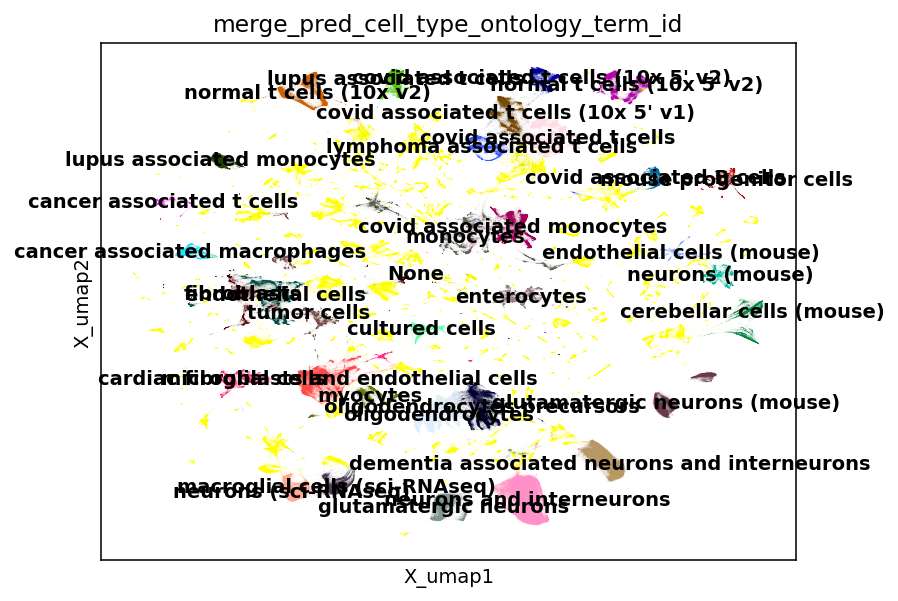

In [146]:
sc.pl.embedding(adata, 'X_umap', color='merge_pred_cell_type_ontology_term_id', legend_loc="on data")

In [5]:
tokeep = [i for i,j in adata.obs['conv_pred_cell_type_ontology_term_id'].value_counts().items() if j > 10_000]

adata.obs["conv_pred_cell_type_ontology_term_id"] = adata.obs["conv_pred_cell_type_ontology_term_id"].cat.add_categories("None")


adata.obs.loc[~adata.obs['conv_pred_cell_type_ontology_term_id'].isin(tokeep), "conv_pred_cell_type_ontology_term_id"] = "None"

In [6]:
len(set(adata.obs['conv_pred_cell_type_ontology_term_id']))

57

In [6]:
adata.obs['conv_pred_cell_type_ontology_term_id'] = adata.obs['conv_pred_cell_type_ontology_term_id'].astype(str)

In [13]:
sc.pl.umap(adata, color='merge_pred_cell_type_ontology_term_id', legend_loc='on data')

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

KeyboardInterrupt: 

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font f

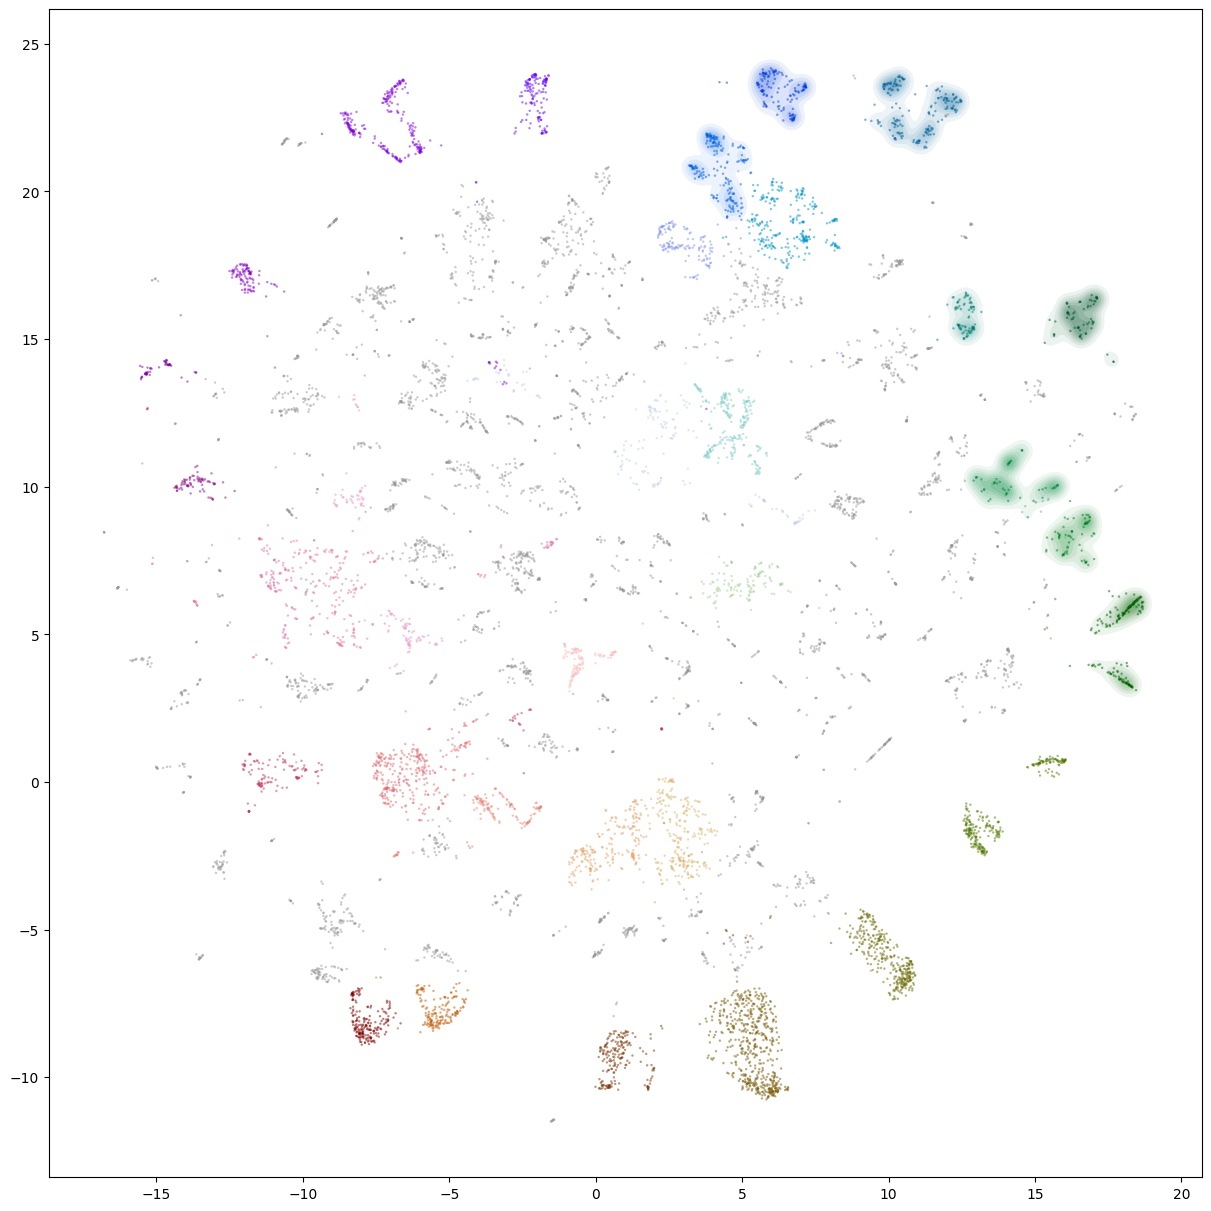

In [12]:
fig, ax =  datamapplot.create_plot(adata.obsm['X_umap'][:10_000], np.array(adata.obs['merge_pred_cell_type_ontology_term_id'].tolist()[:10_000]), darkmode=False, 
    title="", 
    noise_label="None", 
    #label_font_size=12,
    max_font_size=15,
    min_font_size=13,
    font_family="arial",
    dynamic_label_size=True,
    arrowprops={
        "arrowstyle":"->",
      #  "connectionstyle":"arc3,rad=0.3",
    },
)
fig.show()

In [ ]:
adata.obs.loc[adata.obs['merge_pred_cell_type_ontology_term_id']=='covid associated t cells (10x 5\' v1)', 'merge_pred_cell_type_ontology_term_id'] = "covid associated t cells"
adata.obs.loc[adata.obs['merge_pred_cell_type_ontology_term_id']=='covid associated t cells (10x 5\' v2)', 'merge_pred_cell_type_ontology_term_id'] = "covid associated t cells"
adata.obs.loc[adata.obs['merge_pred_cell_type_ontology_term_id']=='normal t cells (10x 5\' v2)', 'merge_pred_cell_type_ontology_term_id'] = "normal t cells 5'"
adata.obs.loc[adata.obs['merge_pred_cell_type_ontology_term_id']=='normal t cells (10x v2)', 'merge_pred_cell_type_ontology_term_id'] = "normal t cells 3'"



findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

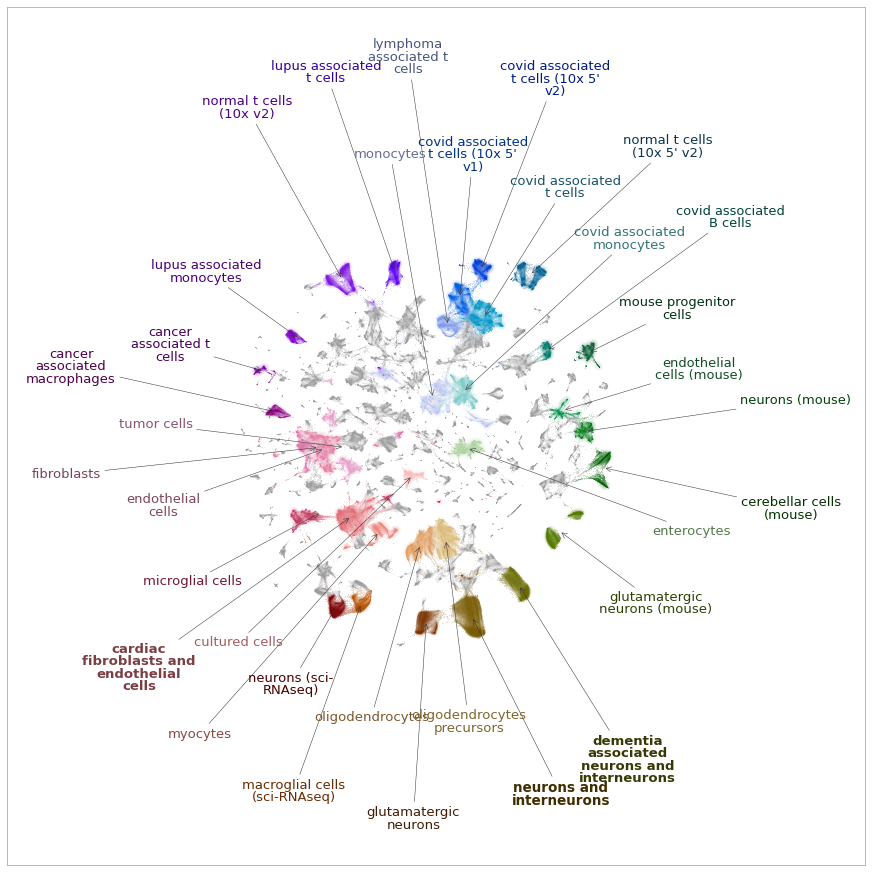

In [14]:
fig, ax =  datamapplot.create_plot(adata.obsm['X_umap'], np.array(adata.obs['merge_pred_cell_type_ontology_term_id'].tolist()), darkmode=False, 
    title="", 
    noise_label="None", 
    #label_font_size=12,
    max_font_size=15,
    min_font_size=13,
    font_family="Arial",
    dynamic_label_size=True,
    arrowprops={
        "arrowstyle":"->",
      #  "connectionstyle":"arc3,rad=0.3",
    },
)
fig.show()

In [ ]:
fig.savefig("../pred_celltype_sampled_2M_datamap.pdf", backend="cairo", transparent=True)


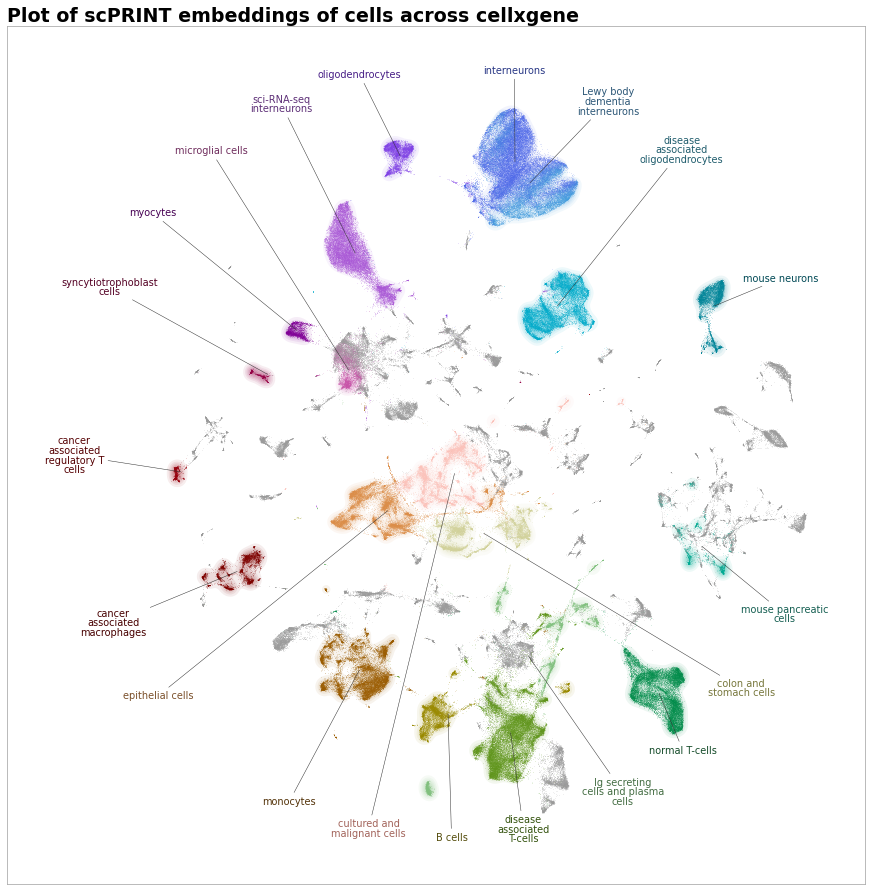

In [150]:
fig, ax =  datamapplot.create_plot(adata.obsm['X_umap'], np.array(adata.obs['merge_pred_cell_type_ontology_term_id'].tolist()), darkmode=False, title="Plot of scPRINT embeddings of cells across cellxgene", noise_label="None")
fig.savefig("../pred_celltype_sampled_1M_datamap.pdf", bbox_inches="tight")
fig.show()